# AIChampionsHub : Academy

### Module 2: Adapting AI for Enterprise Use : Retrival Augmented Generation

### Use Case 04C : Semantic Chucking of Data before storing in a Vector Database
This is part of Course by **AIChampionsHub** - AI Fundamentals and AI Engineering Courses leverage this Notebook.

---
<a href="https://github.com/aichampionslearn/01_LLM_Basics"><img src="https://img.shields.io/badge/GitHub%20Repository-black?logo=github"></a>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github.com/aichampionslearn/01_LLM_Basics/blob/main/AICH_L2_AIAgents_M1_D3_BasicLLMAppv01.ipynb)

In [1]:
%pip install --quiet --upgrade langchain langchain-openai langchain-text-splitters langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.9/433.9 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.4 MB/s eta 0:00:00


# DataSet
- First we will use simple Datasets. One of Paulgraham's essay
- https://paulgraham.com/mit.html

## Semantic Chunking
- Splitting Text based on Context and Meaning.
  All information relevant to a "topic" is in one Chunk.
  Here we will use NLP for meaning and then group text / content into Coherent Unit Based on Meaning.
- Key Steps:
  - A) Load the Document or Content
  - B) Tokenize - e.g. use Sentence Tokenizer to split text (or Paragraph or document) into Sentences.
  - C) Embeddings: Allow us to represent text in Numeric and optimal manner


In [4]:
# Step 2 : Recursive Charecter Splitter
with open('./billionaireBuild_short.txt') as file:
    pg_essay = file.read()

In [5]:
import re
def paragraph_to_sentences_Splitter(paragraph):

    # Here we will split the Paragraph into sentenences based on Period.
    sentences = re.split(r'(?<=[.])\s+', paragraph)
    print (f"Number of Sentences : {len(sentences)} ")

    #Conver this to a dictionary for easy use
    #sentences = [{'index':i, 'sentence':s} for i, s in enumerate(sentences)]
    return sentences

In [6]:
sentences = paragraph_to_sentences_Splitter(pg_essay)
sentences[2] #Example

Number of Sentences : 25 


"There has been so much nonsense written about this topic that I've been meaning for years to write something telling founders the truth."

## Let us Embed the Documents

In [7]:
# We will embed each Sentence and add to the same dictonary for use
from google.colab import userdata
from dotenv import load_dotenv
import os

# load_dotenv()
# OPENAI_API_KEY=os.getenv("OPENAI_API_KEY")
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

from langchain.embeddings import OpenAIEmbeddings
embed_model = OpenAIEmbeddings(api_key = OPENAI_API_KEY)

# embeddings= embed_model.embed_documents([s['sentence'] for s in sentences])

# Also add these embeddings to the dictionary of document
# len(embeddings)
# for i, sentence in enumerate(sentences):
#    sentence['sentence_embeddings'] = embeddings[i]

<ipython-input-7-22a0455920c8>:11: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embed_model = OpenAIEmbeddings(api_key = OPENAI_API_KEY)


## We can use Cosine Similarty find if two sentences to close to each other or so.

In [9]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
import numpy as np


# METHOD 1

In [38]:
def create_semantic_chunks(sentences):
    semantic_chunks = [] # Our Semantic Chunk will be a list of list
    # sen_embeddings = [np.array(embed_model.embed_query(sentence)).reshape(1,-1) for sentence in sentences]
    SIMILARITY_THRESHOLD = 0.79
    sen_embeddings = []
    for i in range(len(sentences)):
        sen_embeddings.append(np.array(embed_model.embed_query(sentences[i])).reshape(1,-1))

    for i in range(len(sentences)):
         if i == 0:
            semantic_chunks.append([sentences[i]])
            # sentence['similarity_score'] = 0.5 # Initial score
         else:
            similarity_score = cosine_similarity(sen_embeddings[i-1], sen_embeddings[i])
            if similarity_score[0][0] > SIMILARITY_THRESHOLD: #You can choose cut-off as required for your use case
               semantic_chunks[-1].append(sentences[i]) # Append to previous
               print("Combined ", i, similarity_score[0][0])
            else:
               semantic_chunks.append([sentences[i]])
               # print("New Chunk")

    return semantic_chunks;

In [39]:
chunks = create_semantic_chunks(sentences)

Combined  3 0.7939147820689862
Combined  8 0.8176719742175904
Combined  9 0.8096456147306642
Combined  11 0.8387353720430503
Combined  12 0.8752690052929877
Combined  13 0.8732818084669409
Combined  14 0.8031764237720349
Combined  15 0.8000873591036721
Combined  17 0.8627256299914521
Combined  19 0.8061955291621322
Combined  20 0.8051344820260606
Combined  22 0.8280380701277062
Combined  23 0.7991121736415259


In [40]:
# Print Sentences for Comparison
for i, sen in enumerate(sentences[:5]):
    #buffer = 200

    print (f"Sent #{i}")
    print (sen[:buffer])
    print ("...")


Sent #0
December 2020
As I was deciding what to write about next, I was surprised to find that two separate essays I'd been planning to write were actually the same.
...
Sent #1
The first is about how to ace your Y Combinator interview.
...
Sent #2
There has been so much nonsense written about this topic that I've been meaning for years to write something telling founders the truth.
...
Sent #3
The second is about something politicians sometimes say — that the only way to become a billionaire is by exploiting people — and why this is mistaken.
...
Sent #4
Keep reading, and you'll learn both simultaneously.
...


In [41]:
for i, chunk in enumerate(chunks[:5]):
    #buffer = 200

    print (f"Chunk #{i}")
    print (chunk[:buffer])
    print ("...")


Chunk #0
["December 2020\nAs I was deciding what to write about next, I was surprised to find that two separate essays I'd been planning to write were actually the same."]
...
Chunk #1
['The first is about how to ace your Y Combinator interview.']
...
Chunk #2
["There has been so much nonsense written about this topic that I've been meaning for years to write something telling founders the truth.", 'The second is about something politicians sometimes say — that the only way to become a billionaire is by exploiting people — and why this is mistaken.']
...
Chunk #3
["Keep reading, and you'll learn both simultaneously."]
...
Chunk #4
['I know the politicians are mistaken because it was my job to predict which people will become billionaires.']
...


# METHOD 2

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_distances(sentences):
    distances = []
    for i in range(len(sentences) - 1):
        embedding_current = sentences[i]['sentence_embeddings']
        embedding_next = sentences[i + 1]['sentence_embeddings']

        # Calculate cosine similarity
        similarity = cosine_similarity([embedding_current], [embedding_next])[0][0]

        # Convert to cosine distance
        distance = 1 - similarity

        # Append cosine distance to the list
        distances.append(distance)

        # Store distance in the dictionary
        sentences[i]['distance_to_next'] = distance

    # Optionally handle the last sentence
    # sentences[-1]['distance_to_next'] = None  # or a default value

    return distances, sentences

In [ ]:
distances, sentences = calculate_cosine_distances(sentences)

In [ ]:
distances[:5]

[np.float64(0.2489595778888034),
 np.float64(0.220791782971977),
 np.float64(0.2060962189590696),
 np.float64(0.21969075584461406),
 np.float64(0.2939967129269785)]

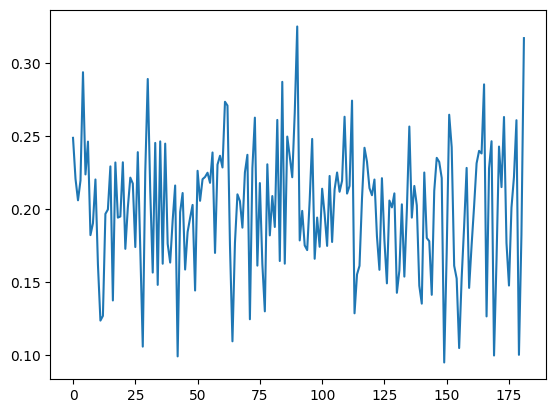

In [ ]:
import matplotlib.pyplot as plt

plt.plot(distances); #Distances shown in Y..X axis is sentence numbers

In [ ]:
# Initialize the start index
start_index = 0
breakpoint_percentile_threshold = 95
breakpoint_distance_threshold = np.percentile(distances, breakpoint_percentile_threshold) # If you want more chunks, lower the percentile cutoff

indices_above_thresh = [i for i, x in enumerate(distances) if x > breakpoint_distance_threshold] # The indices of those breakpoints on your list

# Create a list to hold the grouped sentences
chunks = []

# Iterate through the breakpoints to slice the sentences
for index in indices_above_thresh:
    # The end index is the current breakpoint
    end_index = index

    # Slice the sentence_dicts from the current start index to the end index
    group = sentences[start_index:end_index + 1]
    combined_text = ' '.join([d['sentence'] for d in group])
    chunks.append(combined_text)

    # Update the start index for the next group
    start_index = index + 1

# The last group, if any sentences remain
if start_index < len(sentences):
    combined_text = ' '.join([d['sentence'] for d in sentences[start_index:]])
    chunks.append(combined_text)

# grouped_sentences now contains the chunked sentences


In [ ]:
for i, chunk in enumerate(chunks[:2]):
    buffer = 200

    print (f"Chunk #{i}")
    print (chunk[:buffer].strip())
    print ("...")
    print (chunk[-buffer:].strip())
    print ("\n")


Chunk #0
December 2020
As I was deciding what to write about next, I was surprised to find that two separate essays I'd been planning to write were actually the same. The first is about how to ace your Y Combi
...
second is about something politicians sometimes say — that the only way to become a billionaire is by exploiting people — and why this is mistaken. Keep reading, and you'll learn both simultaneously.


Chunk #1
I know the politicians are mistaken because it was my job to predict which people will become billionaires. I think I can truthfully say that I know as much about how to do this as anyone. If the key
...
trying to figure out: is there a path to a huge market? [1]

Sometimes it's obvious there will be a huge market. If Boom manages to ship an airliner at all, international airlines will have to buy it.


